In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns
pd.set_option('display.max_columns', 500)

## Ideas

- Guide to buying a house for a familiy, based on number of people, etc:


In [2]:
df = pd.read_csv('../Data/DC_Properties.csv')

C:\Users\Sverrir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_clean = pd.read_csv('../Data/Properties_clean.csv',index_col=0)

Let's say our objective is to find a good deal in Washington DC

In [4]:
df_clean

,LATITUDE,LONGITUDE,PRICE,BATHRM,HF_BATHRM,BEDRM,FIREPLACES,LANDAREA,SALEYEAR,TSEYB,TSYR_RMDL,AREA,AREA_M2
7,38.915408,-77.040129,1050000.0,3.0,1.0,4.0,1.0,1627.0,2011.0,39.0,0.0,2401.0,223.060415
8,38.915017,-77.039903,1430000.0,3.0,1.0,3.0,1.0,1424.0,2018.0,51.0,10.0,1488.0,138.239857
14,38.915038,-77.039716,1325000.0,3.0,1.0,3.0,1.0,1815.0,2011.0,44.0,11.0,2692.0,250.095226
16,38.915018,-77.039844,1240000.0,3.0,1.0,3.0,0.0,1424.0,2010.0,43.0,4.0,1662.0,154.405002
19,38.915019,-77.040138,592250.0,3.0,1.0,3.0,1.0,1424.0,2013.0,44.0,0.0,1598.0,148.459202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158948,38.911840,-77.019420,460000.0,2.0,0.0,2.0,0.0,573.0,2012.0,74.0,6.0,934.0,86.771523
158949,38.911840,-77.019420,550000.0,1.0,1.0,1.0,0.0,690.0,2015.0,77.0,9.0,1123.0,104.330215
158952,38.911840,-77.019420,399900.0,1.0,0.0,1.0,0.0,394.0,2015.0,77.0,9.0,639.0,59.365100
158953,38.911840,-77.019420,416000.0,1.0,0.0,2.0,0.0,506.0,2013.0,75.0,7.0,820.0,76.180567


In [5]:
df_clean.AREA_M2.max()

453.36727394345917

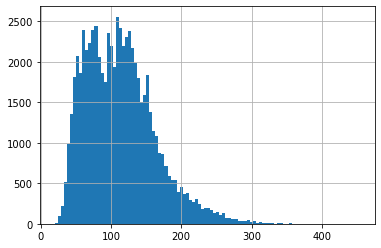

In [6]:
df_clean.AREA_M2.hist(bins=100)

In [7]:
df_clean.loc[:,'PPSF'] = df_clean.PRICE/df_clean.AREA


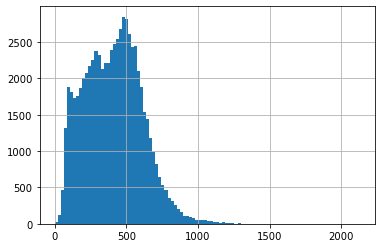

In [8]:
(df_clean.PPSF).hist(bins=100)

In [9]:
df_clean.PPSF.min()

0.10960105217010083

In [10]:
df_clean.PPSF.max()

2127.402674591382

In [11]:
df.EXTWALL.value_counts()

Common Brick      81068
Brick/Siding       5569
Vinyl Siding       5290
Wood Siding        4540
Stucco             3216
Shingle            1181
Brick Veneer       1069
Aluminum            954
Stone               744
Brick/Stucco        673
Brick/Stone         626
Face Brick          512
Stone/Siding        339
Stone Veneer        254
Stone/Stucco        238
Hardboard           119
Concrete             82
Metal Siding         66
Concrete Block       54
Stucco Block         51
Default              32
Plywood              15
Adobe                 2
SPlaster              1
Rustic Log            1
Name: EXTWALL, dtype: int64

In [15]:
df_clean.columns

Index(['LATITUDE', 'LONGITUDE', 'PRICE', 'BATHRM', 'HF_BATHRM', 'BEDRM',
       'FIREPLACES', 'LANDAREA', 'SALEYEAR', 'TSEYB', 'TSYR_RMDL', 'AREA',
       'AREA_M2', 'PPSF'],
      dtype='object')

In [12]:
def scatter_heat_map(df,variable,title):
    var_by_loc =df.groupby(['LATITUDE','LONGITUDE']).mean().loc[:,variable]
    var_by_loc_99 = var_by_loc[var_by_loc<np.quantile(var_by_loc.dropna(),0.99)]
    plt.figure(figsize=(10,10))
    plt.scatter(var_by_loc_99.index.get_level_values('LATITUDE'),
                var_by_loc_99.index.get_level_values('LONGITUDE'),
                c=var_by_loc_99,
               s=2,cmap='plasma')
    plt.title(title,fontsize=25)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [21]:
df

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,2003-11-25 00:00:00,1095000.0,Q,1,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,3.0,2000-08-17 00:00:00,NaN,U,1,2567.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2016-06-21 00:00:00,2100000.0,Q,3,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,3.0,2006-07-12 00:00:00,1602000.0,Q,1,2484.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,3.0,NaN,NaN,U,1,5255.0,1,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood,1.0,0,13,2032,2018-07-22 18:01:43,Residential,NaN,NaN,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158952,158952,1,0,Forced Air,Y,NaN,3,1,1938.0,2006.0,1938,NaN,2015-04-03 00:00:00,399900.0,Q,4,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,394,2018-07-22 18:01:38,Condominium,2786.0,639.0,NaN,NaN,NaN,20001.0,NaN,38.911840,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158953,158953,1,0,Forced Air,Y,NaN,4,2,1938.0,2006.0,1938,NaN,2013-10-04 00:00:00,416000.0,Q,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,506,2018-07-22 18:01:38,Condominium,2786.0,820.0,NaN,NaN,NaN,20001.0,NaN,38.911840,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158954,158954,2,0,Forced Air,Y,NaN,4,2,1920.0,2007.0,1920,NaN,2008-09-30 00:00:00,600000.0,U,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,467,2018-07-22 18:01:38,Condominium,2880.0,1167.0,NaN,NaN,NaN,20001.0,NaN,38.911840,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158955,158955,1,0,Warm Cool,Y,NaN,2,0,1965.0,NaN,1965,NaN,2015-04-14 00:00:00,215100.0,Q,3,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17,332,2018-07-22 18:01:38,Condominium,2275.0,447.0,NaN,NaN,NaN,20024.0,NaN,38.872953,-77.018230,Southwest Waterfront,NaN,11000.0,NaN,Ward 6,504,-77.018232,38.872961,SW


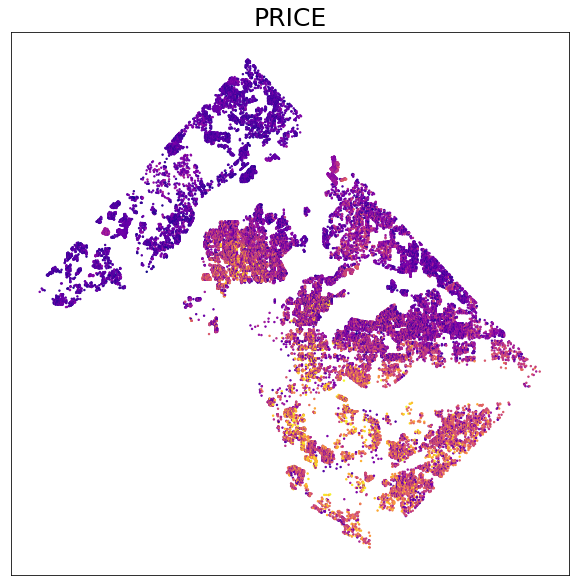

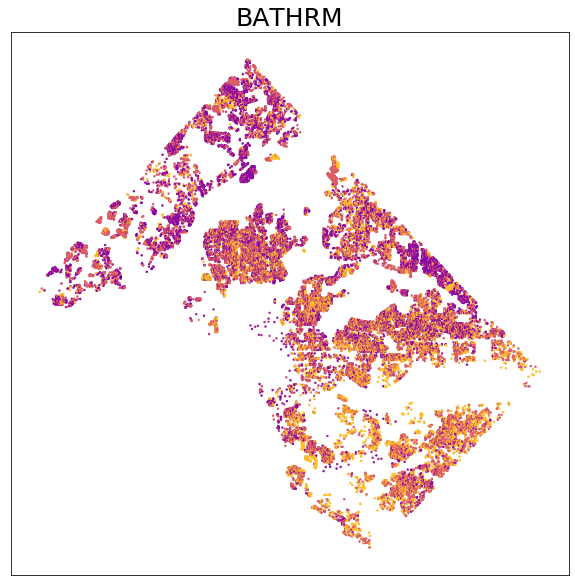

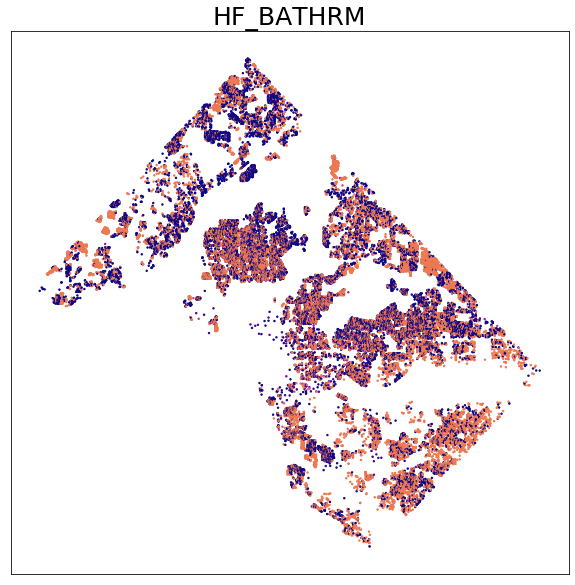

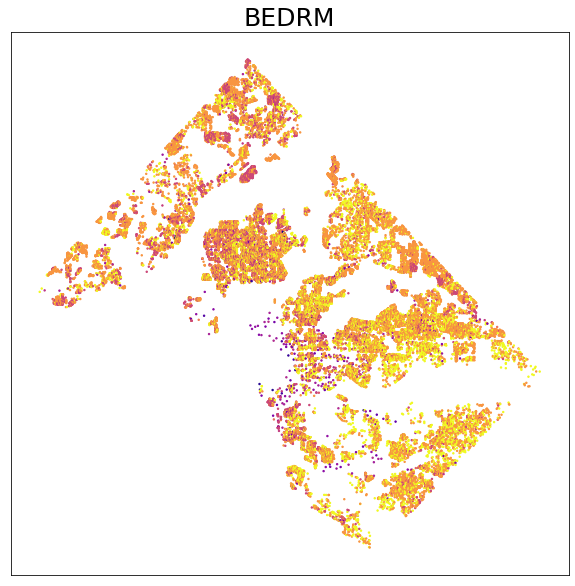

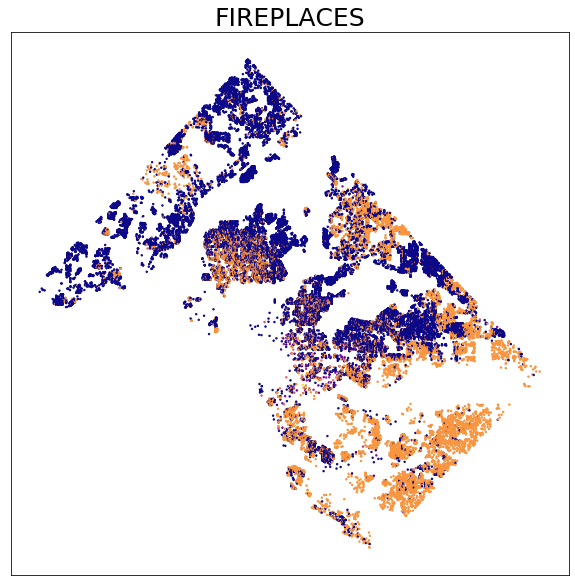

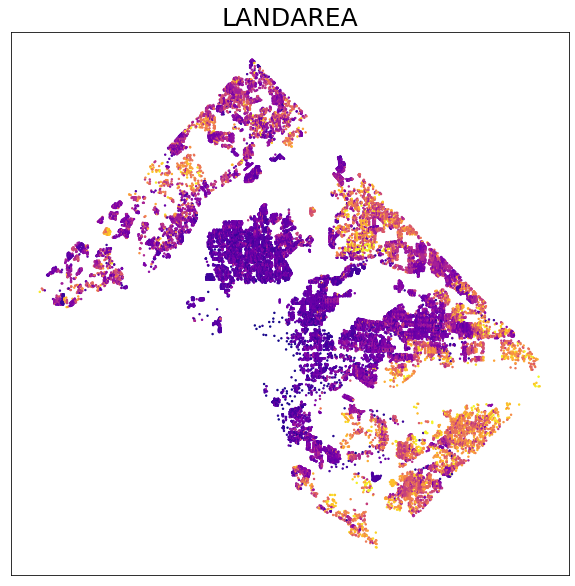

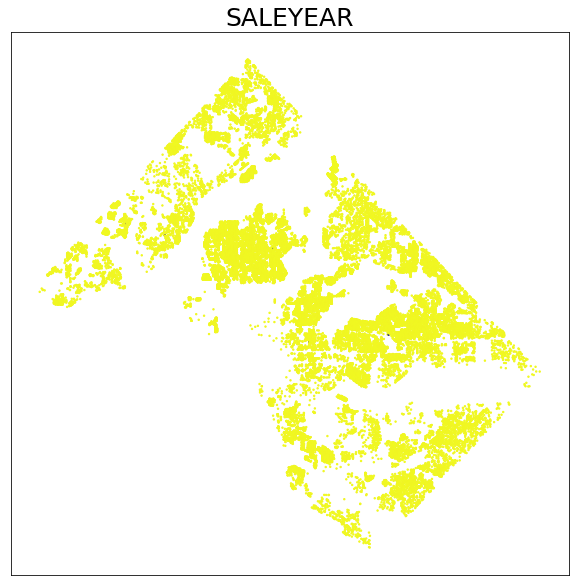

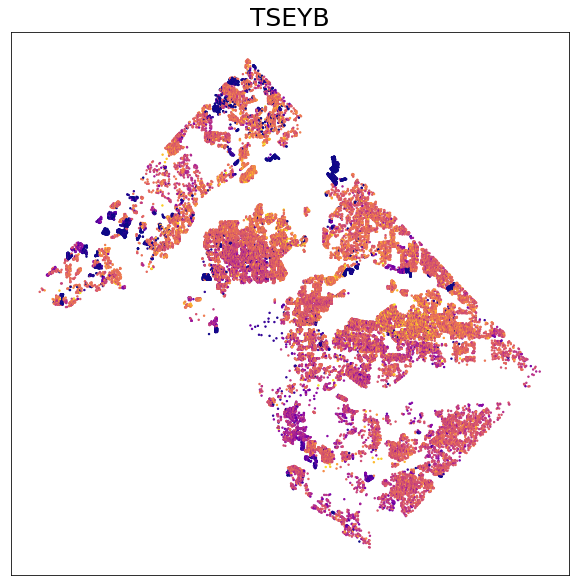

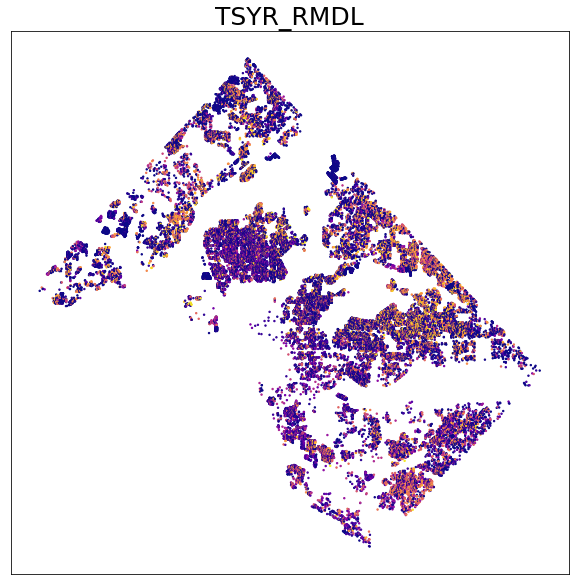

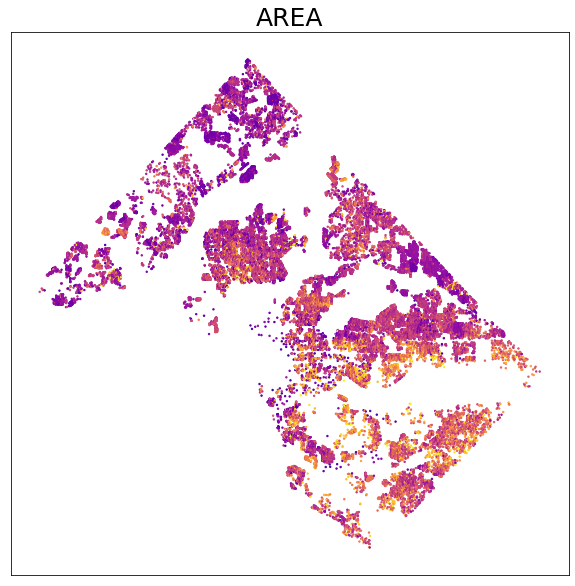

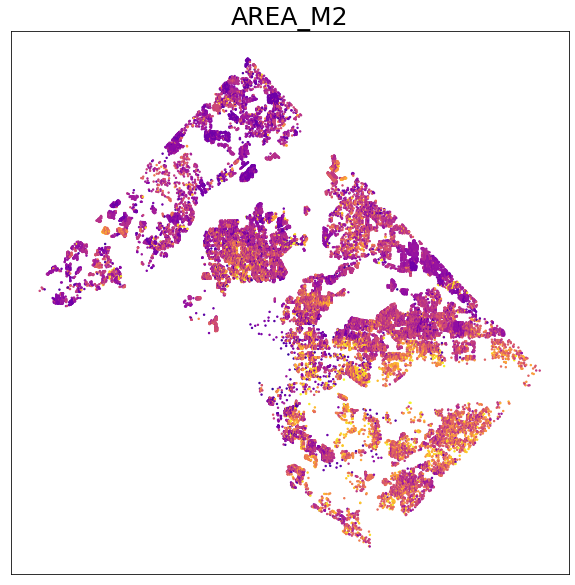

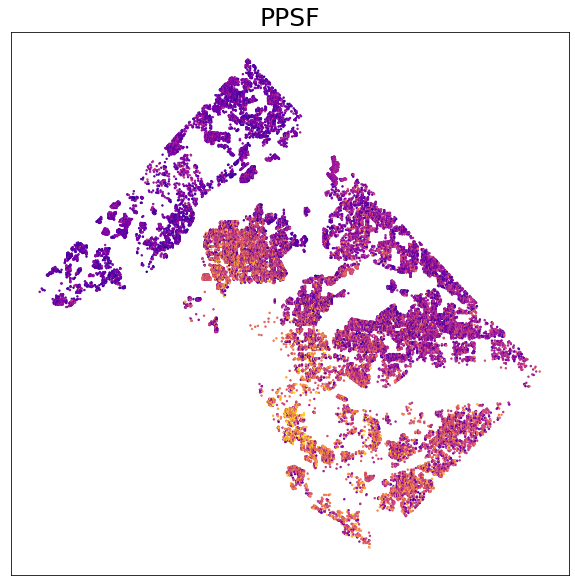

In [20]:
for col in df_clean:
    if col not in ['LATITUDE','LONGITUDE']:
        scatter_heat_map(df_clean,col,col)

In [22]:
df.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [ ]:
scatter_heat_map(df,col,col)

In [45]:
def NoneIfTooShort(x):

In [69]:
df_rounded = df.copy()


In [86]:
df.ROOF.value_counts()

Built Up          31402
Comp Shingle      30301
Metal- Sms        29957
Slate             11135
Neopren            1254
Shake               907
Clay Tile           654
Shingle             433
Metal- Pre          244
Typical             229
Composition Ro      102
Metal- Cpr           41
Concrete Tile        17
Water Proof           9
Wood- FS              7
Concrete              4
Name: ROOF, dtype: int64

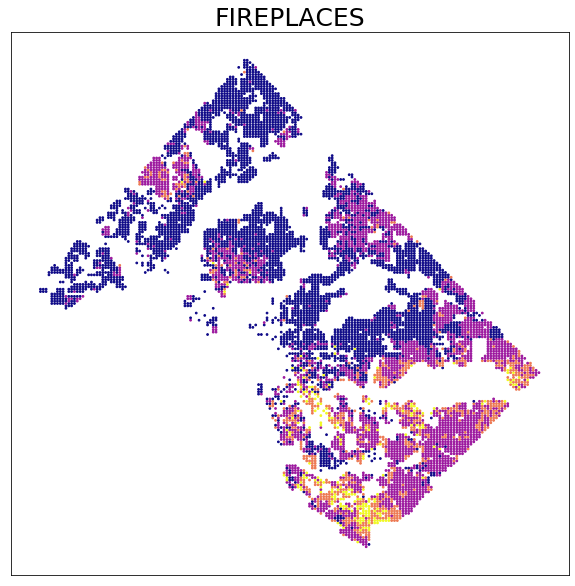

In [79]:
def scatter_categorical_map(df_raw,variable,title,factor):
    # Drop all other variables than the one of interest to save computation in rounding
    df_rounded = df_raw.loc[:,[variable,'LATITUDE','LONGITUDE']].dropna().copy()
    
    # Round the coordinates to the bin size requested
    df_rounded.loc[:,['LATITUDE','LONGITUDE']] = df_raw.loc[:,['LATITUDE','LONGITUDE']].round(factor).copy()
    
    df_tmp  = df_rounded.copy()
    var_by_loc = df_tmp.groupby(['LATITUDE','LONGITUDE']).agg(lambda x:x.value_counts().index[0]).loc[:,variable]
    var_by_loc_99 = var_by_loc[var_by_loc<np.quantile(var_by_loc.dropna(),0.99)]
    plt.figure(figsize=(10,10))
    plt.scatter(var_by_loc_99.index.get_level_values('LATITUDE'),
                var_by_loc_99.index.get_level_values('LONGITUDE'),
                c=var_by_loc_99,
               s=3,cmap='plasma')
    plt.title(title,fontsize=25)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
scatter_categorical_map(df,'FIREPLACES','FIREPLACES',3)

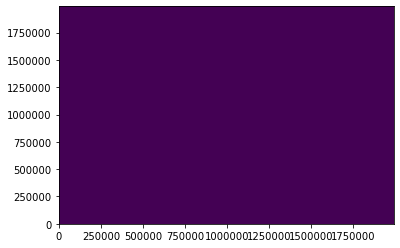

In [108]:

plt.show()

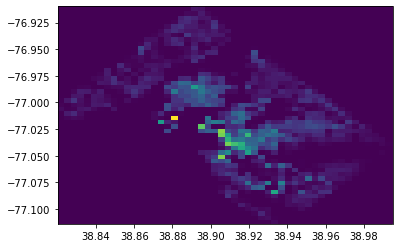

TypeError: cannot unpack non-iterable NoneType object

In [120]:
def bin_number(dataframe, n_bins):
    min_x,max_x = dataframe.loc[:,'LATITUDE'].min(),dataframe.loc[:,'LATITUDE'].max()
    min_y,max_y = dataframe.loc[:,'LONGITUDE'].min(),dataframe.loc[:,'LONGITUDE'].max()
    x_bins = np.linspace(min_x,max_x,n_bins)
    y_bins = np.linspace(min_y,max_y,n_bins)
#     return x_bins,y_bins
    plt.hist2d(df_clean.LATITUDE,df_clean.LONGITUDE,bins=[n_bins,n_bins])
    plt.show()
    
x_bins,y_bins = bin_number(df_clean,50)

In [121]:
# plt.scatter(x_bins,y_bins)

In [157]:
# Price map for specific number of bedrooms/rooms
# Mean, median, most common, min/max?
def price_map_with_constraints(dataframe, var, constraint, aggregate, factor):

    # Drop all other variables than the one of interest to save computation in rounding
    df_sub = dataframe.loc[:,[var,'LATITUDE','LONGITUDE','PRICE']].copy()
    
    # Constrain
    df_sub = df_sub.loc[constraint(df_sub.loc[:,var])]    
    
    # Round location values to factor
    df_sub.loc[:,['LATITUDE','LONGITUDE']] = df_sub.loc[:,['LATITUDE','LONGITUDE']].round(factor).copy()
    
    # Remove outliters for better color range
    df_sub = df_sub.loc[df_sub.PRICE < 1_000_000,:]
    
    # Bin by location and aggregate with function
    var_by_loc = df_sub.groupby(['LATITUDE','LONGITUDE']).agg(aggregate).loc[:,[var,'PRICE']]
    
    f,ax = plt.subplots(1,2, figsize=(12,6))
    ax[0].scatter(var_by_loc.index.get_level_values('LATITUDE'),
                var_by_loc.index.get_level_values('LONGITUDE'),
                c=var_by_loc.loc[:,'PRICE'],vmin=0,vmax=1_000_000,
               s=3,cmap='plasma')
    ax[1].hist(var_by_loc.loc[:,'PRICE'],bins=100)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.show()



In [158]:
plt.scatter()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

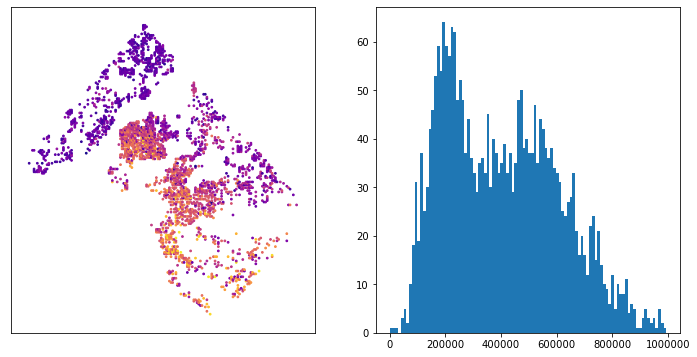

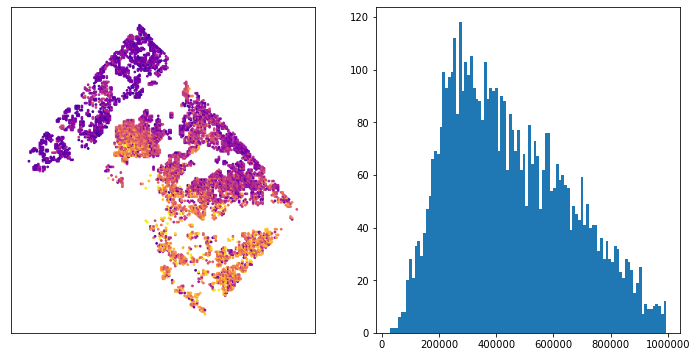

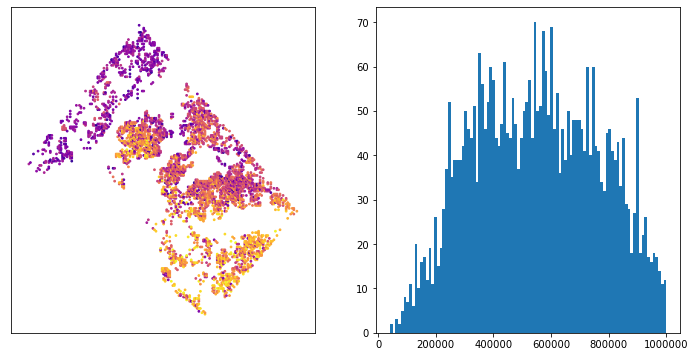

In [159]:
constr_1 = (lambda x: x == 2)
constr_2 = (lambda x: x == 3)
constr_3 = (lambda x: x == 4)

# Mean, median, most_common
agg_1 = (lambda x: np.mean(x))
agg_2 = (lambda x: np.median(x))
agg_3 = (lambda x: x.value_counts().index[0])
price_map_with_constraints(df_clean, 'BEDRM', constr_1, agg_1, 3)
price_map_with_constraints(df_clean, 'BEDRM', constr_2, agg_1, 3)
price_map_with_constraints(df_clean, 'BEDRM', constr_3, agg_1, 3)

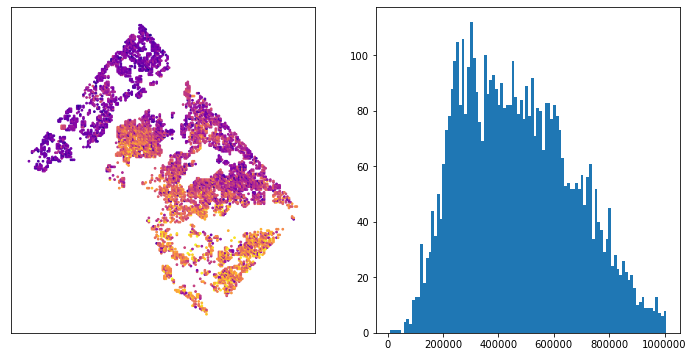

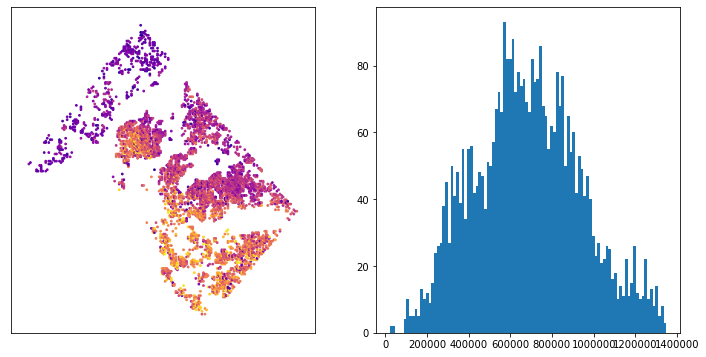

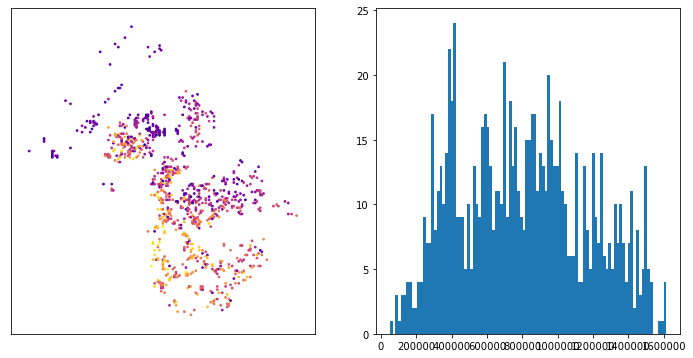

In [153]:

price_map_with_constraints(df_clean, 'BATHRM', constr_1, agg_1, 3)
price_map_with_constraints(df_clean, 'BATHRM', constr_2, agg_1, 3)
price_map_with_constraints(df_clean, 'BATHRM', constr_3, agg_1, 3)

In [152]:
df_clean

,LATITUDE,LONGITUDE,PRICE,BATHRM,HF_BATHRM,BEDRM,FIREPLACES,LANDAREA,SALEYEAR,TSEYB,TSYR_RMDL,AREA,AREA_M2,PPSF
7,38.915408,-77.040129,1050000.0,3.0,1.0,4.0,1.0,1627.0,2011.0,39.0,0.0,2401.0,223.060415,437.317784
8,38.915017,-77.039903,1430000.0,3.0,1.0,3.0,1.0,1424.0,2018.0,51.0,10.0,1488.0,138.239857,961.021505
14,38.915038,-77.039716,1325000.0,3.0,1.0,3.0,1.0,1815.0,2011.0,44.0,11.0,2692.0,250.095226,492.199108
16,38.915018,-77.039844,1240000.0,3.0,1.0,3.0,0.0,1424.0,2010.0,43.0,4.0,1662.0,154.405002,746.089049
19,38.915019,-77.040138,592250.0,3.0,1.0,3.0,1.0,1424.0,2013.0,44.0,0.0,1598.0,148.459202,370.619524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158948,38.911840,-77.019420,460000.0,2.0,0.0,2.0,0.0,573.0,2012.0,74.0,6.0,934.0,86.771523,492.505353
158949,38.911840,-77.019420,550000.0,1.0,1.0,1.0,0.0,690.0,2015.0,77.0,9.0,1123.0,104.330215,489.759573
158952,38.911840,-77.019420,399900.0,1.0,0.0,1.0,0.0,394.0,2015.0,77.0,9.0,639.0,59.365100,625.821596
158953,38.911840,-77.019420,416000.0,1.0,0.0,2.0,0.0,506.0,2013.0,75.0,7.0,820.0,76.180567,507.317073
